In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('Mall_Customers.csv')

In [40]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [49]:
df['GenderN'] = df['Gender'].str.lower().map({'female':0, 'male':1})

In [50]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),GenderN
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [51]:
df = df.drop('Gender', axis=1)

In [73]:
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
from sklearn.cluster import KMeans
KMeans4 = KMeans(n_clusters = 4)

In [74]:
KMeans4.fit(df)

KMeans(n_clusters=4)

In [76]:
centroids = KMeans4.cluster_centers_
labels = KMeans4.labels_
#cluster_centers_ attribute holds the centroids of the clusters 4 cluster.
#labels_ attribute contains the cluster labels assigned to each data point in the dataset. 0,1,2,3 each is different cluster

In [77]:
centroids

array([[162.        ,  32.69230769,  86.53846154,  82.12820513,
          0.46153846],
       [ 30.06779661,  36.10169492,  29.86440678,  49.86440678,
          0.37288136],
       [ 92.48484848,  43.87878788,  57.72727273,  49.25757576,
          0.43939394],
       [164.        ,  40.80555556,  87.91666667,  17.88888889,
          0.52777778]])

In [78]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

In [79]:
#Now can not  visualize a dataset because we have five features and five features means five dimension. 
#Therefore we are apply pca which is unsupervised dimension reduction algorithm to get 2 dimensional data.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
#We are reduced dimension in our data not in our 'kmeaned data' because in kmeans algorithm we just use labels and centroids

C:\Users\ferit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


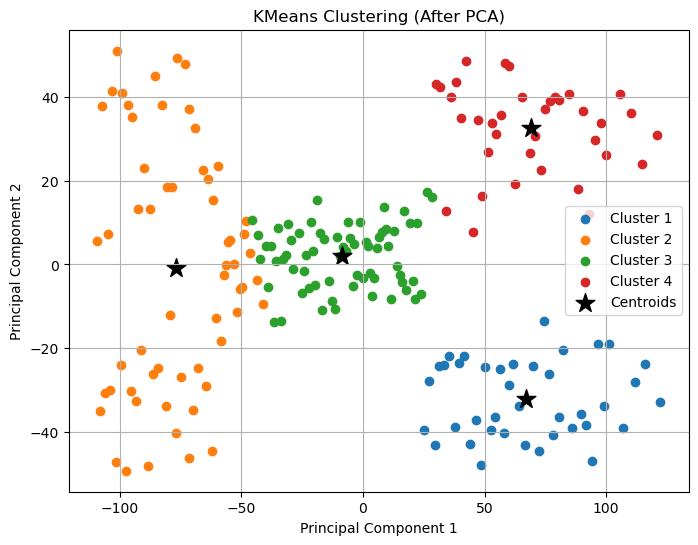

In [80]:
#Visiulazing
plt.figure(figsize=(8, 6))

# Loop through each cluster, extract the data points belonging to each cluster from the reduced 2D space (X_pca),
# and plot them using plt.scatter. Different clusters are plotted with different colors.
for i in range(len(set(labels))):
    cluster_points = X_pca[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

# Plotting centroids
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, color='black', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (After PCA)')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
#The inertia_ attribute in scikit-learn's KMeans provides the sum of
#squared distances of samples to their closest cluster center. Lower inertia indicates tighter clusters.
print("Inertia:", KMeans4.inertia_)

Inertia: 195401.19855991466


In [82]:
# The silhouette score measures how well-separated the clusters are. It varies from -1 (worst) to +1 (best). 
#Higher silhouette scores indicate better-defined clusters.
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, KMeans4.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.42245261332521894


C:\Users\ferit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


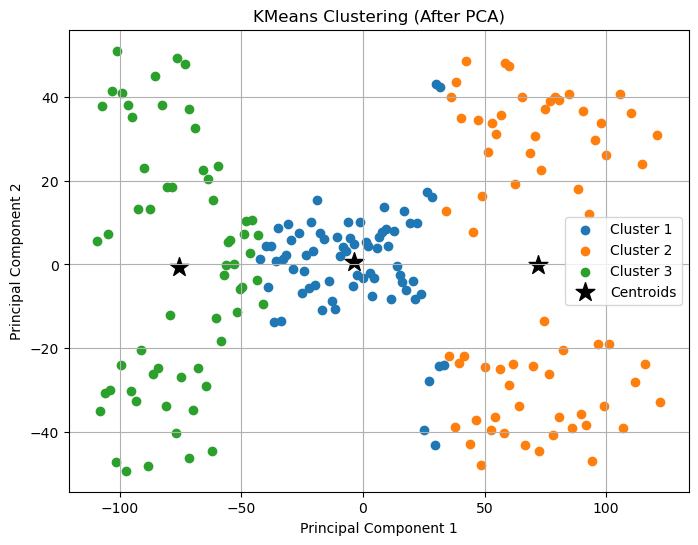

Inertia: 271396.5629660315
Silhouette Score: 0.3766801400675223


In [86]:
#Same algorithm with 3 clusters.
KMeans3 = KMeans(n_clusters = 3)
KMeans3.fit(df)

centroids = KMeans3.cluster_centers_
labels = KMeans3.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

#Visiulazing
plt.figure(figsize=(8, 6))

# Loop through each cluster, extract the data points belonging to each cluster from the reduced 2D space (X_pca),
# and plot them using plt.scatter. Different clusters are plotted with different colors.
for i in range(len(set(labels))):
    cluster_points = X_pca[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

# Plotting centroids
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, color='black', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (After PCA)')
plt.legend()
plt.grid(True)
plt.show()


print("Inertia:", KMeans3.inertia_)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, KMeans3.labels_)
print("Silhouette Score:", silhouette_avg)

C:\Users\ferit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


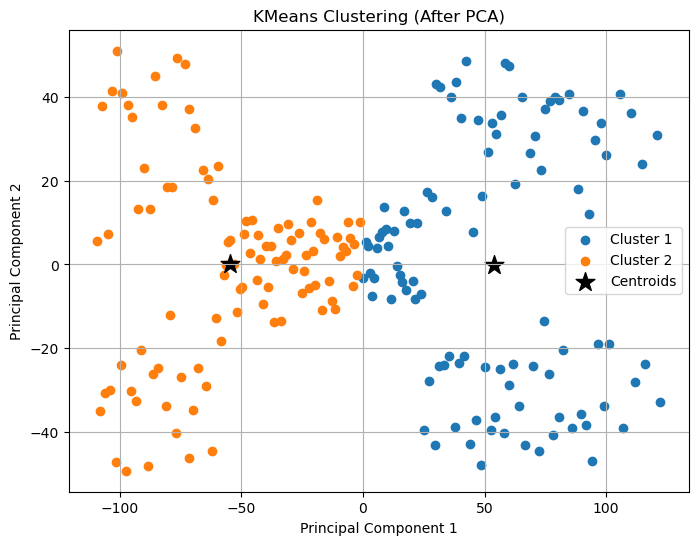

Inertia: 387065.7137713771
Silhouette Score: 0.4793049017423563


In [87]:
#Same algorithm with 2 clusters.
KMeans2 = KMeans(n_clusters = 2)
KMeans2.fit(df)

centroids = KMeans2.cluster_centers_
labels = KMeans2.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

#Visiulazing
plt.figure(figsize=(8, 6))

# Loop through each cluster, extract the data points belonging to each cluster from the reduced 2D space (X_pca),
# and plot them using plt.scatter. Different clusters are plotted with different colors.
for i in range(len(set(labels))):
    cluster_points = X_pca[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

# Plotting centroids
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, color='black', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (After PCA)')
plt.legend()
plt.grid(True)
plt.show()


print("Inertia:", KMeans2.inertia_)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, KMeans2.labels_)
print("Silhouette Score:", silhouette_avg)

C:\Users\ferit\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


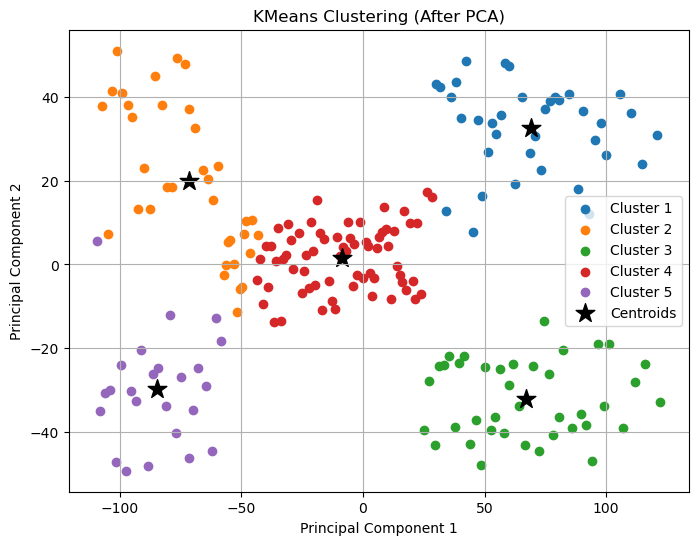

Inertia: 157215.86697469198
Silhouette Score: 0.4242840145700636


In [88]:
#Same algorithm with 5 clusters.
KMeans5 = KMeans(n_clusters = 5)
KMeans5.fit(df)

centroids = KMeans5.cluster_centers_
labels = KMeans5.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

#Visiulazing
plt.figure(figsize=(8, 6))

# Loop through each cluster, extract the data points belonging to each cluster from the reduced 2D space (X_pca),
# and plot them using plt.scatter. Different clusters are plotted with different colors.
for i in range(len(set(labels))):
    cluster_points = X_pca[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

# Plotting centroids
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='*', s=200, color='black', label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering (After PCA)')
plt.legend()
plt.grid(True)
plt.show()


print("Inertia:", KMeans5.inertia_)

from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, KMeans5.labels_)
print("Silhouette Score:", silhouette_avg)

In [ ]:
#We run algorithm we different clusters and We find with 2 cluster algortihm works better.